In [1]:
%matplotlib inline

In [20]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import openweathermapy as ow

from datetime import datetime

# Import API key
from config import owm_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Settings openweathermappy
settings = {"units": "imperial", "appid": owm_api_key}
# Key data to extract
citydata = ["name","sys.country","dt","main.temp_max","coord.lat","coord.lon","wind.speed",\
            "main.humidity","clouds.all"]
# Column names for dataframe
column_names = ["City","Country","Date","Max Temp","Latitude","Longitude","Wind Speed",\
            "Humidity","Cloudiness"]

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Create list of cities (city_name,country_Code) using citipy  
cities = [f"{citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name},\
{citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code}" for lat_lng in lat_lngs]

# Remove duplicates
cities = list(set(cities))

In [5]:
len(cities)

598

In [6]:
# Function to loop thru each set of cities and request their weather info
# Return a DataFrame of cities
def getCityWeather(cities, setNumber, rowsPerset):
    
    # Calculate first and last rows for the set
    numberOfCities = len(cities)
    firstRow = (rowsPerset * setNumber) - rowsPerset
    lastRow = (rowsPerset * setNumber) 
    if lastRow > numberOfCities:
        lastRow = numberOfCities
    
    # Initialize output message and DataFrame
    output_message = ""
    city_weather = pd.DataFrame(columns=column_names)

    # Loop thru the set of cities and request wheather info
    for recordNo, city in enumerate(cities[firstRow:lastRow]):
        if setNumber == 1:
            recordNo = recordNo + 1
        
        output_message = output_message + f"Processing Record: {recordNo} of Set {setNumber} | {city}\n"
        try:
            weather_data = ow.get_current(city, **settings)
            city_data = pd.DataFrame([list(weather_data.get_many(citydata))],columns=column_names)
            city_weather = pd.concat([city_weather,city_data])
        except Exception as e:
            output_message = output_message + f"City not found. Skipping...\n"
    
    # Print and output the log
    print(output_message)
    with open(output_data_file, "a") as output_file:
        output_file.writelines(output_message)
    
    return(city_weather)

In [7]:
# Rows to process per each set. 
rowsPerSet = 50
numberOfCities = len(cities)

# Calculate total number based on the rowsPerSet value
totalSets = int(numberOfCities / rowsPerSet) + 1
if (numberOfCities % rowsPerSet) != 0:
    totalSets = totalSets + 1

# Create empty DataFrame
city_weather_df = pd.DataFrame(columns=column_names)

# Loop thru the totalSets and build final DataFrame
for i in range(1,totalSets):
    city_weather_df = pd.concat([city_weather_df,getCityWeather(cities, i, rowsPerSet)])

city_weather_df = city_weather_df.reset_index()


Processing Record: 1 of Set 1 | taoudenni,ml
Processing Record: 2 of Set 1 | kargil,in
Processing Record: 3 of Set 1 | knysna,za
Processing Record: 4 of Set 1 | sao filipe,cv
Processing Record: 5 of Set 1 | tianpeng,cn
Processing Record: 6 of Set 1 | new norfolk,au
Processing Record: 7 of Set 1 | kulhudhuffushi,mv
Processing Record: 8 of Set 1 | saryshagan,kz
City not found. Skipping...
Processing Record: 9 of Set 1 | negara,id
Processing Record: 10 of Set 1 | chicama,pe
Processing Record: 11 of Set 1 | bara,sd
City not found. Skipping...
Processing Record: 12 of Set 1 | leshukonskoye,ru
Processing Record: 13 of Set 1 | alofi,nu
Processing Record: 14 of Set 1 | tottori,jp
Processing Record: 15 of Set 1 | okha,ru
Processing Record: 16 of Set 1 | cabedelo,br
Processing Record: 17 of Set 1 | havre-saint-pierre,ca
Processing Record: 18 of Set 1 | ostersund,se
Processing Record: 19 of Set 1 | pangnirtung,ca
Processing Record: 20 of Set 1 | chokurdakh,ru
Processing Record: 21 of Set 1 | alya

Processing Record: 0 of Set 5 | wencheng,cn
Processing Record: 1 of Set 5 | balikpapan,id
Processing Record: 2 of Set 5 | lazurne,ua
Processing Record: 3 of Set 5 | dondaicha,in
Processing Record: 4 of Set 5 | presidente epitacio,br
Processing Record: 5 of Set 5 | aitape,pg
Processing Record: 6 of Set 5 | turinskaya sloboda,ru
Processing Record: 7 of Set 5 | mpraeso,gh
Processing Record: 8 of Set 5 | bethel,us
Processing Record: 9 of Set 5 | yulara,au
Processing Record: 10 of Set 5 | kaz,ru
Processing Record: 11 of Set 5 | ruatoria,nz
City not found. Skipping...
Processing Record: 12 of Set 5 | indiaroba,br
Processing Record: 13 of Set 5 | glyadyanskoye,ru
Processing Record: 14 of Set 5 | longyearbyen,sj
Processing Record: 15 of Set 5 | kikwit,cd
Processing Record: 16 of Set 5 | portarlington,ie
Processing Record: 17 of Set 5 | san patricio,mx
Processing Record: 18 of Set 5 | celles,be
Processing Record: 19 of Set 5 | camaqua,br
Processing Record: 20 of Set 5 | jasper,us
Processing Rec

Processing Record: 0 of Set 9 | ilulissat,gl
Processing Record: 1 of Set 9 | cidreira,br
Processing Record: 2 of Set 9 | boyolangu,id
Processing Record: 3 of Set 9 | avarua,ck
Processing Record: 4 of Set 9 | constitucion,cl
Processing Record: 5 of Set 9 | deputatskiy,ru
Processing Record: 6 of Set 9 | landau,de
Processing Record: 7 of Set 9 | chase,ca
Processing Record: 8 of Set 9 | urumqi,cn
City not found. Skipping...
Processing Record: 9 of Set 9 | katsuura,jp
Processing Record: 10 of Set 9 | banmo,mm
City not found. Skipping...
Processing Record: 11 of Set 9 | marcona,pe
City not found. Skipping...
Processing Record: 12 of Set 9 | durham,us
Processing Record: 13 of Set 9 | necochea,ar
Processing Record: 14 of Set 9 | amahai,id
Processing Record: 15 of Set 9 | cardston,ca
Processing Record: 16 of Set 9 | mbandaka,cd
Processing Record: 17 of Set 9 | nizhniy tsasuchey,ru
Processing Record: 18 of Set 9 | portland,au
Processing Record: 19 of Set 9 | hobart,au
Processing Record: 20 of Se

In [40]:
# Get process date for plot titles
process_date = datetime.utcfromtimestamp(city_weather_df.iloc[0]["Date"]).strftime('%m/%d/%y')
city_weather_df["Humidity"] = city_weather_df["Humidity"].astype(float)
city_weather_df["Max Temp"] = city_weather_df["Max Temp"].astype(float)
city_weather_df["Cloudiness"] = city_weather_df["Cloudiness"].astype(float)
city_weather_df["Wind Speed"] = city_weather_df["Wind Speed"].astype(float)

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (07/03/19)')

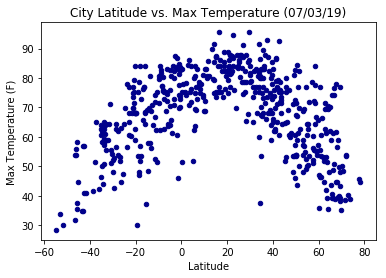

In [37]:
ax = city_weather_df.plot.scatter(x="Latitude", y="Max Temp", c="DarkBlue")
ax.set_ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({process_date})")

Text(0.5, 1.0, 'City Latitude vs. Humidity (07/03/19)')

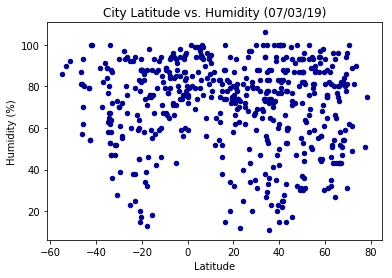

In [38]:
ax = city_weather_df.plot.scatter(x="Latitude", y="Humidity", c="DarkBlue")
ax.set_ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({process_date})")

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (07/03/19)')

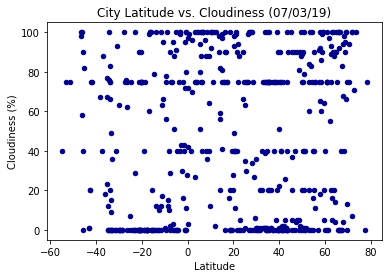

In [41]:
ax = city_weather_df.plot.scatter(x="Latitude", y="Cloudiness", c="DarkBlue")
ax.set_ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({process_date})")

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (07/03/19)')

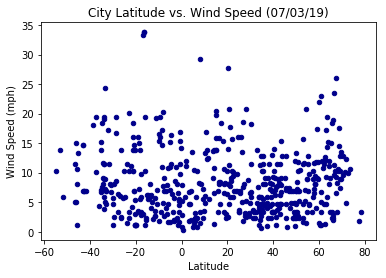

In [42]:
ax = city_weather_df.plot.scatter(x="Latitude", y="Wind Speed", c="DarkBlue")
ax.set_ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({process_date})")